In [2]:
# TO FIND A LINEAR RELATIONSHIP HEAD SIZE AND HEAD BRAIN
# WE APPLY LINEAR REGRESSION
%matplotlib inline
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0,10.0)
#read data
data = pd.read_csv('headbrain.csv')
data.head(5)

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
data.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [4]:
data.corr()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
Gender,1.000000,-0.088652,-0.514050,-0.465266
Age Range,-0.088652,1.000000,-0.105428,-0.169438
Head Size(cm^3),-0.514050,-0.105428,1.000000,0.799570
Brain Weight(grams),-0.465266,-0.169438,0.799570,1.000000


In [5]:
# collect data
X=data['Head Size(cm^3)'].values
Y=data['Brain Weight(grams)'].values

In [6]:
# We need to calculate mean of X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)
# to calculate total number of values
m = len(X)
# TO FIND THE VAALUE OF b0 and b1
num = 0
den = 0
for i in range(m):
    num+=(X[i]-mean_x)*(Y[i]-mean_y)
    den+=(X[i]-mean_x)**2
b1 = num/den
b0 = mean_y-(b1*mean_x)
# print coefficient 
print(b1,b0)


0.26342933948939945 325.57342104944223


<AxesSubplot:xlabel='Head Size(cm^3)', ylabel='Brain Weight(grams)'>

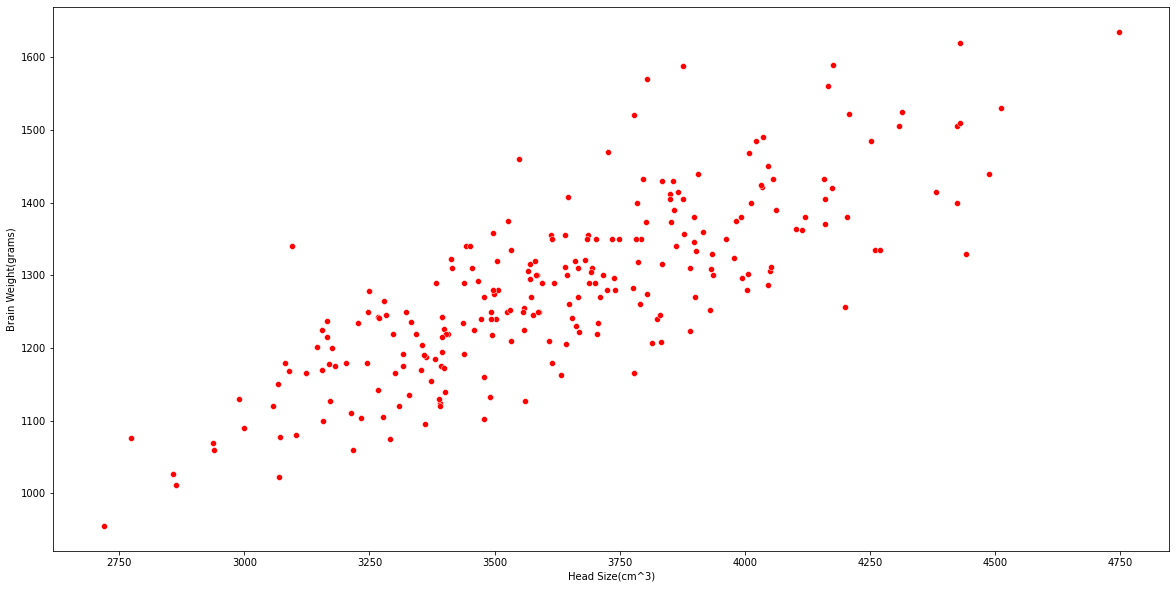

In [7]:
# To plot the scatter graph
import seaborn as sn
sn.scatterplot(data=data , x = 'Head Size(cm^3)', y =  'Brain Weight(grams)', color = 'red')

<AxesSubplot:xlabel='Head Size(cm^3)', ylabel='Brain Weight(grams)'>

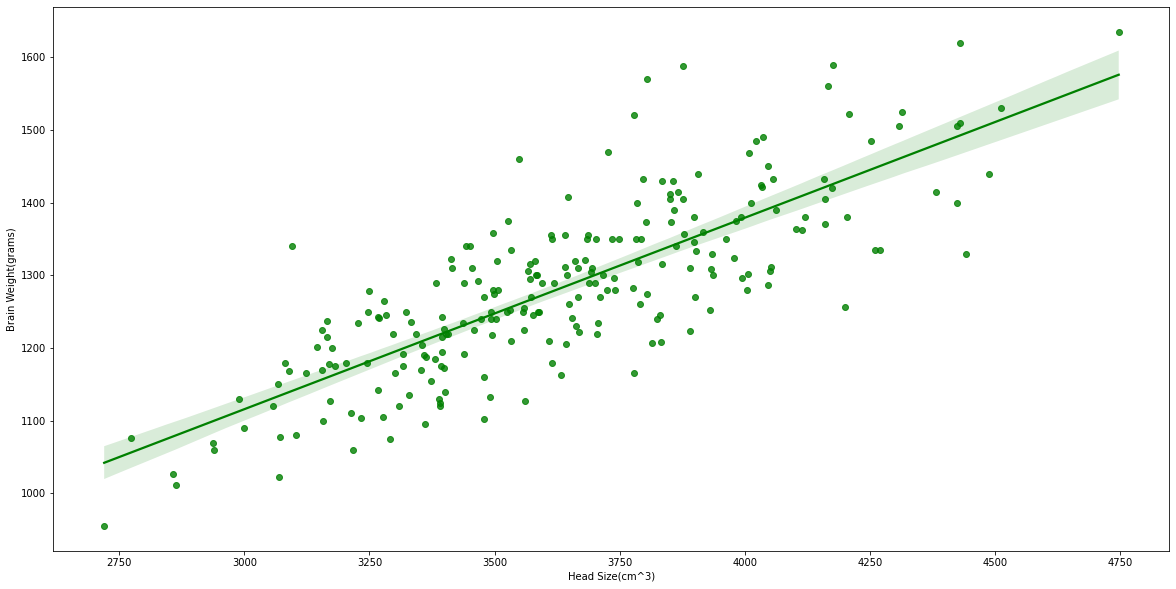

In [8]:
# REGRESSION PLOT
import seaborn as sn
x = data['Head Size(cm^3)'].values
y =  data['Brain Weight(grams)'].values
sn.regplot(data = data, x = 'Head Size(cm^3)', y =  'Brain Weight(grams)', color = 'green')

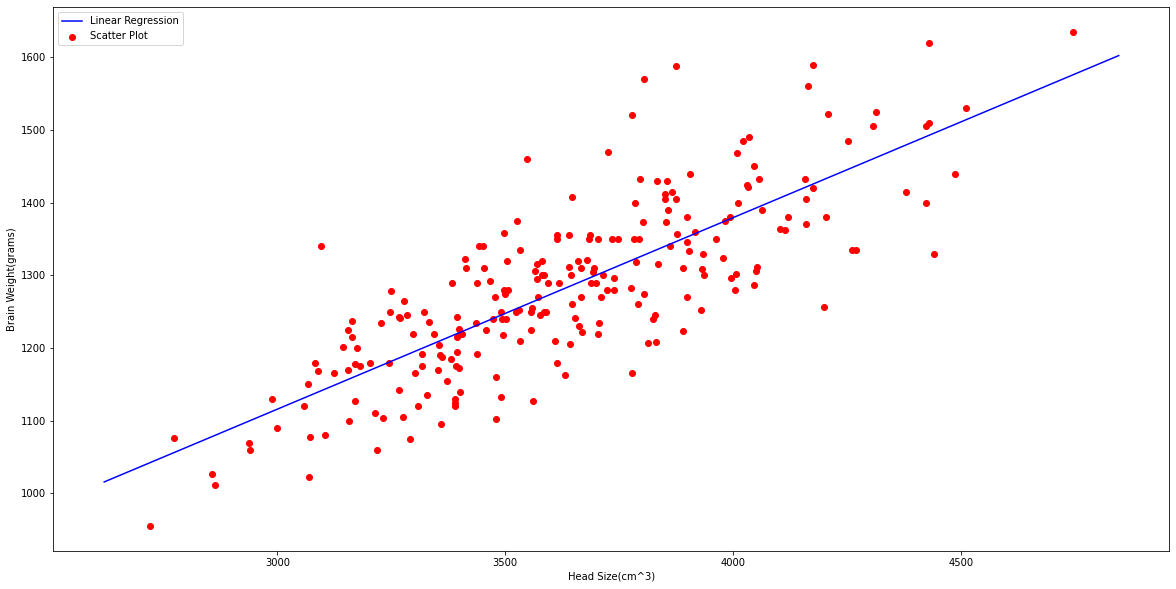

In [9]:
max_x =np.max(X)+100
min_x =np.min(X)-100
# To calculate the values of x and y
x = np.linspace(min_x,max_x,1000)
y= b0 + b1*x
#plotting line
plt.plot(x,y,color = 'b',label= 'Linear Regression')
# plotting linear regression
plt.scatter(X,Y,c = 'r',label= 'Scatter Plot')

plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.legend()
plt.show()

In [10]:
# to compare the r square
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# can use rank 1 matrix in scikit learn
X = X.reshape((m,1))
reg=LinearRegression()
# Fitting the train data
reg = reg.fit(X,Y)
Y_pred = reg.predict(X)
# Calculating R2
r2_score = reg.score(X,Y)
print(r2_score)

0.639311719957
